<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Proyecto4x4YPF_transflogar%C3%ADtmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.


## **Modelado**


En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.

In [2]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df.csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Producción de agua,Profundidad,Mes,Año
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,32,172,0,3844,2025,1
1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,55,3,0,4945,2025,1


In [4]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [5]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.0,172.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,55.0,3.0,4945.0,2025.0,1.0


In [6]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en números enteros

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Profundidad,Mes,Año
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,32,172,3844,2025,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2827,2025,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2977,2025,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,4092,2025,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,55,3,4945,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56413,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2046,2024,12
56414,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1642,101,5889,2024,12
56415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2441,153,0,2024,12
56416,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4491,2024,12


In [7]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o más variables independientes (predictoras). En su forma más simple (regresión lineal simple), ajusta una línea recta a los datos con la fórmula:

𝑦 = 𝑎 + 𝑏 ⋅ 𝑥

donde:

y es la variable dependiente,
x es la variable independiente,
a es la intersección con el eje Y (intercepto),
b es la pendiente de la recta (coeficiente).

In [8]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas

In [9]:
x = Produccion_ypf.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [10]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Profundidad,Mes,Año
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3844.0,2025.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2827.0,2025.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.0,2025.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4092.0,2025.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4945.0,2025.0,1.0


In [11]:
lista_atributos = x.columns

In [12]:
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

Este código aplica una transformación logarítmica a la variable objetivo y usando np.log1p(y), que calcula log(1 + y). Esta técnica se utiliza en modelos de regresión (como la regresión lineal) para:

* Reducir la asimetría de la distribución de la variable objetivo.

* Suavizar valores extremos o muy grandes (outliers).

* Mejorar el ajuste del modelo, especialmente cuando y tiene una distribución sesgada o crecimiento exponencial.

El uso de log1p en lugar de log permite evitar errores con valores cero, ya que log(0) no está definido.

In [13]:
# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)  # log(1 + y), para evitar problemas con valores cero

In [14]:
x, y =np.array(x), np.array(y_log)

In [15]:
x

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.844e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.827e+03, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.977e+03, 2.025e+03,
        1.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 0.000e+00, 2.024e+03,
        1.200e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 4.491e+03, 2.024e+03,
        1.200e+01],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 4.455e+03, 2.024e+03,
        1.200e+01]])

In [16]:
y_log[:10]

,Produccion de Petroleo,Produccion de Gas
0,3.496508,5.153292
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,4.025352,1.386294
5,0.000000,0.000000
6,6.917706,5.187386
7,0.000000,0.000000
8,2.397895,3.135494
9,6.487684,5.241747


### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relación entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempeño del modelo con datos que no ha visto antes, simulando cómo funcionará con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [17]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train_log, y_test_log = train_test_split(x, y_log, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [19]:
x.shape

(56418, 27)

In [20]:
X_train.shape

(45134, 27)

In [21]:
y_test_log.shape

(11284, 2)

In [22]:
X_test.shape

(11284, 27)

In [23]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train_log)

LinearRegression()

In [24]:
#predicción en escala logarítmica
y_pred_log = model.predict(X_test)

In [25]:
# Volver a la escala original
y_pred = np.expm1(y_pred_log)  # inversa de log1p: exp(y) - 1
y_test = np.expm1(y_test_log)

El modelo de regresión lineal muestra un MAE muy alto (343.51), lo que indica que las predicciones se desvían significativamente del valor real en promedio. El RMSE también es elevado (1002.43), lo que sugiere la presencia de errores grandes e inestables. Además, el R² es muy bajo (0.07), lo que significa que el modelo apenas explica el 7% de la variabilidad de los datos. En conjunto, estas métricas revelan un bajo desempeño del modelo, indicando que la regresión lineal no es adecuada para este problema.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 343.50547525461207
RMSE: 1002.432924629485
R²: 0.06863335139218313


Forma de y_test: (11284, 2)
Forma de y_pred: (11284, 2)


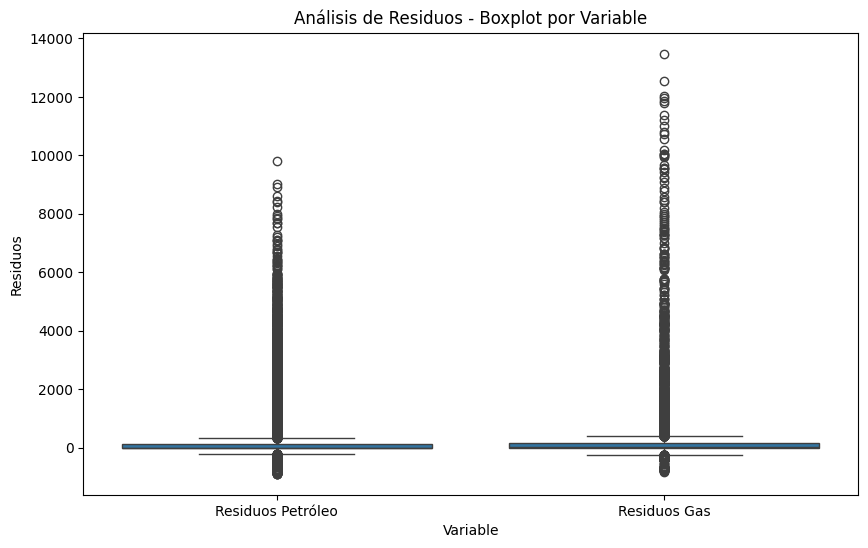

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificamos forma de y_test y y_pred
print("Forma de y_test:", y_test.shape)
print("Forma de y_pred:", y_pred.shape)

# Aseguramos que y_test y y_pred son arrays 2D
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Confirmar que tienen 2 columnas
if y_test.shape[1] == 2 and y_pred.shape[1] == 2:
    # Crear DataFrames con nombres claros
    y_test_df = pd.DataFrame(y_test, columns=['Petróleo', 'Gas'])
    y_pred_df = pd.DataFrame(y_pred, columns=['Petróleo', 'Gas'])

    # Calcular los residuos
    residuals_df = y_test_df - y_pred_df
    residuals_df.columns = ['Residuos Petróleo', 'Residuos Gas']

    # Transformar a formato largo para seaborn
    residuals_long = residuals_df.melt(var_name='Variable', value_name='Residuo')

    # Asegurar que no hay NaN
    residuals_long.dropna(inplace=True)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Variable', y='Residuo', data=residuals_long)
    plt.title('Análisis de Residuos - Boxplot por Variable')
    plt.ylabel('Residuos')
    plt.show()
else:
    print("Error: y_test o y_pred no tienen 2 columnas. Revisa la forma del modelo.")

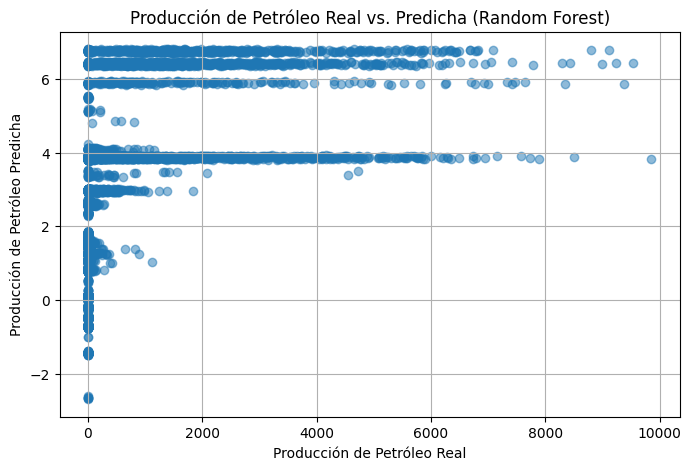

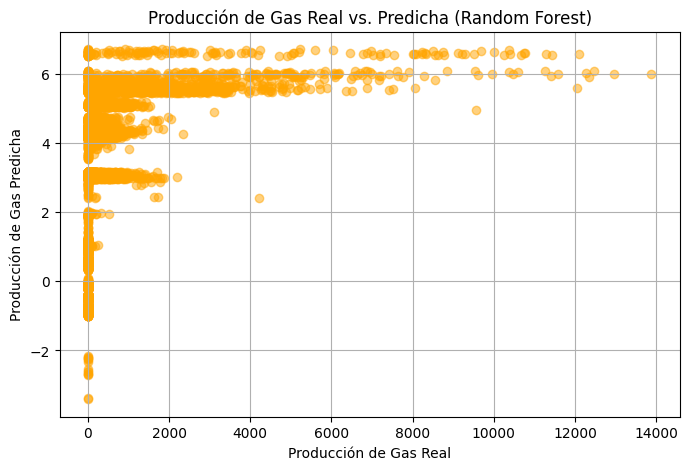

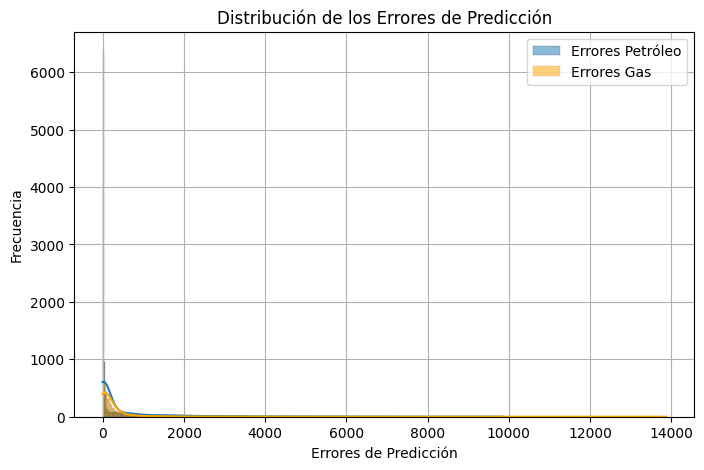

In [28]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()

### **Random Forest**

Random Forest es un modelo de aprendizaje supervisado basado en un conjunto de árboles de decisión. Combina múltiples árboles entrenados con subconjuntos aleatorios de datos y características, y promedia sus resultados para mejorar la precisión y reducir el sobreajuste. Es robusto, versátil y funciona bien tanto en clasificación como en regresión.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [32]:
# Entreno el modelo
regresor.fit(X_train, y_train_log);

In [33]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[5.82851639, 4.43806336],
       [0.09729551, 3.05644032],
       [3.22265114, 2.86531354],
       ...,
       [5.00616498, 3.54581866],
       [4.98662848, 3.55552799],
       [5.61045119, 4.23469871]])

El MAE de 403.40 en el modelo Random Forest indica que, en promedio, las predicciones se desvían del valor real en 403 unidades. Este valor relativamente alto sugiere que el modelo no está logrando una buena precisión, posiblemente debido a una alta variabilidad en los datos o a la necesidad de ajustar hiperparámetros

In [35]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

403.3996625150704

In [36]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  #Consultar si el error tiene que ver con que exista un dato valor a 0 entonces en la feature Producción de Petróleo y Producción de gas contiene algun 0 que hace que la división no se pueda realizar
print(f'MAPE: {mape:.2f}%')

MAPE: nan%


<ipython-input-36-3207779289>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  #Consultar si el error tiene que ver con que exista un dato valor a 0 entonces en la feature Producción de Petróleo y Producción de gas contiene algun 0 que hace que la división no se pueda realizar
<ipython-input-36-3207779289>:1: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  #Consultar si el error tiene que ver con que exista un dato valor a 0 entonces en la feature Producción de Petróleo y Producción de gas contiene algun 0 que hace que la división no se pueda realizar


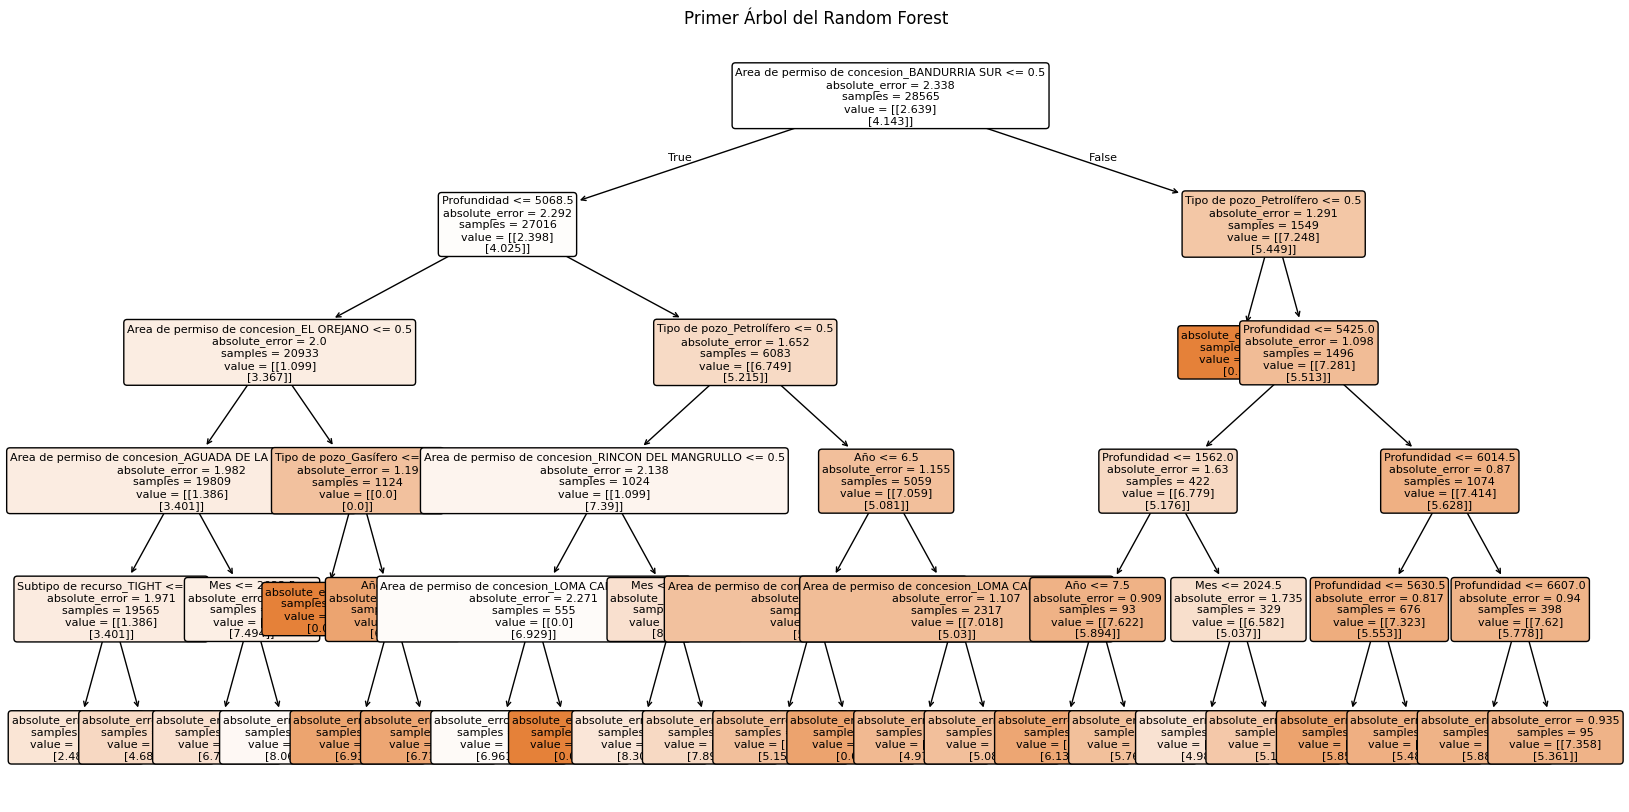

In [37]:
# gráfico de arbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Asegúrate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")

### **Support Vector Machine**

El modelo Support Vector Machine (SVM) es un algoritmo de aprendizaje supervisado que busca encontrar el hiperplano óptimo que mejor separa los datos en el espacio de características. En regresión (SVR), intenta ajustar una línea (o superficie) que mantenga los errores dentro de un margen definido. Es eficaz en problemas complejos, especialmente con datos no lineales, gracias al uso de funciones kernel.

In [38]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [39]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train_log)

MultiOutputRegressor(estimator=SVR())

In [40]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [41]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[7.76826731, 5.78889889],
       [0.11273505, 3.23193627],
       [1.12634567, 3.11648135],
       ...,
       [3.6868349 , 3.86545942],
       [2.90944799, 3.58958338],
       [5.17009734, 4.46956901]])

El MAE del modelo Support Vector Machine (SVM) es de 403.82, muy similar al de Random Forest, que fue de 403.40. Esto indica que ambos modelos tienen un desempeño comparable en cuanto a error absoluto medio: en promedio, sus predicciones se desvían más de 400 unidades del valor real. Ninguno logra una mejora significativa sobre el otro

In [42]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

403.82317330231194

In [54]:
#Consultar si el error tiene que ver con que exista un dato valor a 0 entonces en la feature Producción de Petróleo y Producción de gas contiene algun 0 que hace que la división no se pueda realizar
#Agregar un pequeño valor epsilon para evitar división por cero
epsilon = 1e-10
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

In [55]:
mape

np.float64(306522697354.8602)

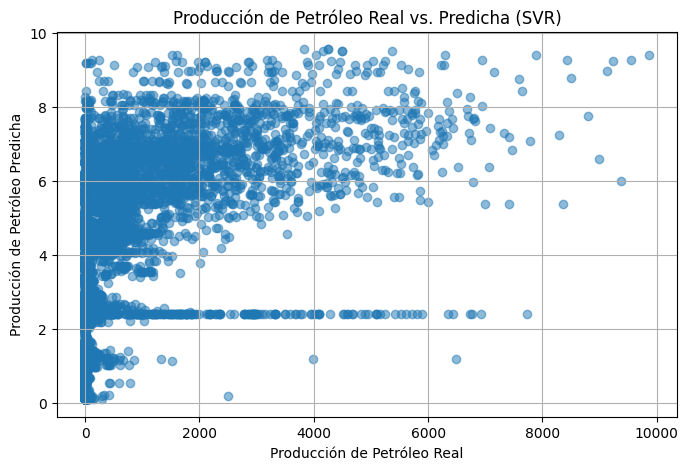

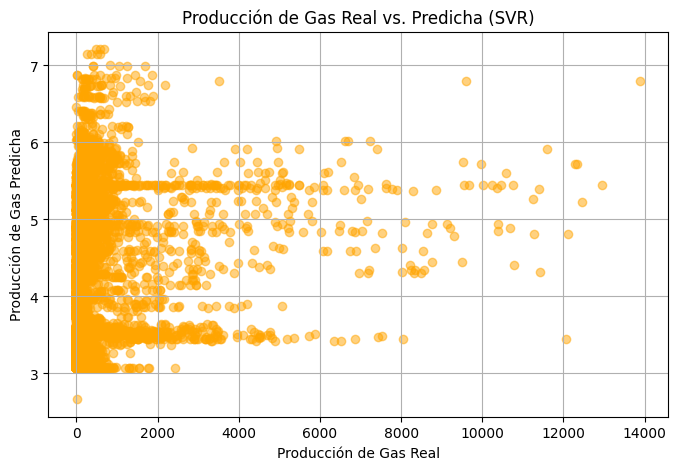

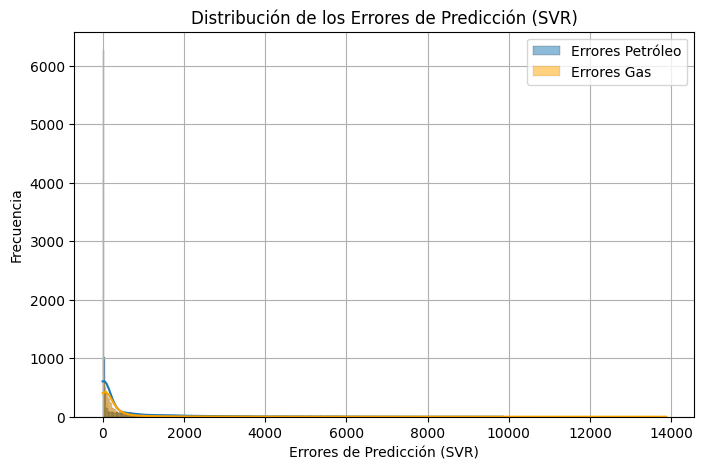

In [43]:
# gráfico support vector machine

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()


### **XGBoost**

GBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en árboles de decisión, diseñado para lograr alta precisión y eficiencia. Utiliza la técnica de boosting, que construye múltiples árboles de manera secuencial, donde cada árbol nuevo corrige los errores del anterior.

En este proyecto, XGBoost se aplica para predecir la producción de petróleo y la producción de gas, utilizando como variables explicativas datos históricos como las áreas de permiso de concesión, el subtipo de recurso, el tipo de pozo, etc.

Gracias a su capacidad para manejar relaciones no lineales y su mecanismo de regularización, XGBoost resulta especialmente útil para modelar fenómenos complejos del sector energético con gran precisión.

In [44]:
from xgboost import XGBRegressor

In [45]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [46]:
modelo_xgb.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

El modelo XGBoost arrojó un MAE de 403.07, lo que indica un desvío promedio alto entre las predicciones y los valores reales. El RMSE de 1115.32 revela errores grandes e inestables en las predicciones. El R² negativo (-0.15) señala que el modelo tiene un rendimiento peor que simplemente predecir el promedio, lo que sugiere que no está capturando correctamente la relación entre las variables. En conjunto, estas métricas reflejan un mal desempeño del modelo y la necesidad de revisar los datos o los hiperparámetros.

In [47]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [48]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 403.06553796592493
RMSE: 1115.321103267975
R²: -0.14864694005340762


### **Optimización: Gridsearch**

GridSearch es una técnica de optimización que mejora el rendimiento del modelo XGBoost buscando la mejor combinación de hiperparámetros (como profundidad de los árboles, tasa de aprendizaje, número de estimadores, etc.). Prueba todas las combinaciones posibles dentro de un rango definido y selecciona la que minimiza el error o maximiza el R². Aplicarlo permite ajustar el modelo a los datos de forma más precisa, mejorando su capacidad predictiva.

In [49]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train_log)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}


In [50]:
best_model = grid_search.best_estimator_

In [51]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 402.98047066544603
RMSE: 1115.2752459416042
R²: -0.1485496579327451


La dispersión de los puntos muestra que el modelo tiende a subestimar las producciones altas. Muchas predicciones están muy por debajo de los valores reales cuando la producción real es alta (por ejemplo >200).

También hay mucho ruido cuando la producción es baja: las predicciones varían mucho cuando la producción real está entre 0 y 100.

Hay predicciones incluso negativas, lo cual puede ser un problema si la producción no puede ser menor a cero (tal vez el modelo necesita que le impongas restricciones o revises el preprocesamiento).

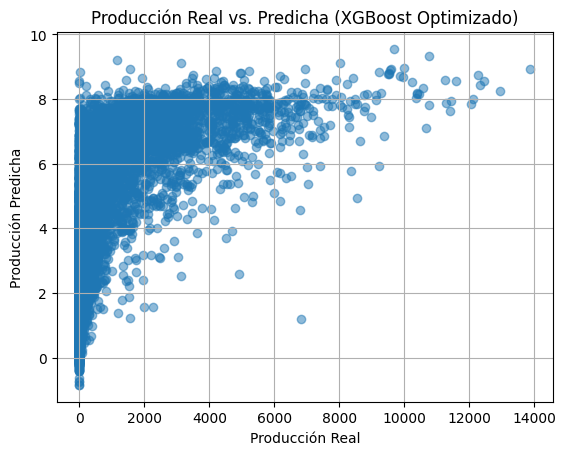

In [52]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()